### Anomoly Detection: Group Project

    Created By: Mijail Mariano

    23AUGUST2022

In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 300

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# pycaret import
# from pycaret.anomaly import *

# plotly import
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"

# created module
import mm_prepare
from mm_prepare import get_logs_dataset

# skimpy module to clean column names
from skimpy import clean_columns

# regular expression module
import re

import env_mm
from env_mm import user, password, host, get_connection

In [2]:
# importing the data

df = get_logs_dataset()
df.head()

df shape: (900223, 11)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0


In [3]:
# dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   endpoint    900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   name        847330 non-null  object 
 7   slack       847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  program_id  847330 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 75.5+ MB


In [4]:
'''function that returns the endpoint class and topic'''
def get_endpoint_targets(df):

    topics = df["endpoint"].str.split("/", n = 2, expand = True).rename(columns = {0: "class", 1: "topic"})
    topics = topics.drop(columns = 2)
    
    new_df = pd.concat([df, topics], axis = 1)

    # returns the new df w/endpoint class and topics
    return new_df

In [5]:
# testing out the function/syntax

df["endpoint"].str.split("/", n = 2, expand = True).rename(columns = {0: "class", 1: "topic"}).drop(columns = 2)

,class,topic
0,,
1,java-ii,None
2,java-ii,object-oriented-programming
3,slides,object_oriented_programming
4,javascript-i,conditionals
...,...,...
900218,jquery,personal-site
900219,jquery,mapbox-api
900220,jquery,ajax
900221,anomaly-detection,discrete-probabilistic-methods


In [6]:
# deploying the function 

df = mm_prepare.get_endpoint_targets(df)
df.head()

df shape: (900223, 13)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,,
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,None
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,slides,object_oriented_programming
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,javascript-i,conditionals


In [7]:
# cleaning "class" labels 

# df = mm_prepare.clean_lesson(df)
# df[df["class"].str.contains("fundamentals") == True]["class"].unique() # checks out!

In [8]:
# using the clean date function

df = mm_prepare.clean_dates(df)
df.head()

new df shape: (900223, 12)


,endpoint,user_id,ip,name,slack,start_date,end_date,program_id,class,topic,day,month
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,,,Friday,January
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,None,Friday,January
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming,Friday,January
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,slides,object_oriented_programming,Friday,January
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,javascript-i,conditionals,Friday,January


In [9]:
# initial data familiarization

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   endpoint    900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   ip          900223 non-null  object 
 3   name        847330 non-null  object 
 4   slack       847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   program_id  847330 non-null  float64
 8   class       900222 non-null  object 
 9   topic       731934 non-null  object 
 10  day         900223 non-null  object 
 11  month       900223 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 89.3+ MB


In [10]:
# setting the program_id to object type

df[["user_id", "program_id"]] = df[["user_id", "program_id"]].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   endpoint    900222 non-null  object
 1   user_id     900223 non-null  object
 2   ip          900223 non-null  object
 3   name        847330 non-null  object
 4   slack       847330 non-null  object
 5   start_date  847330 non-null  object
 6   end_date    847330 non-null  object
 7   program_id  847330 non-null  object
 8   class       900222 non-null  object
 9   topic       731934 non-null  object
 10  day         900223 non-null  object
 11  month       900223 non-null  object
dtypes: object(12)
memory usage: 89.3+ MB


In [11]:
# mapping the codeup program type by program_id

df = mm_prepare.map_program_id(df)
df.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,,,Friday,January,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,Friday,January,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,Friday,January,FS_PHP_program
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program


In [12]:
# cleaning columns with empty class and topic observations
# ~50k nulls in "class" column

# did not work
# df = df.replace(r'^\s*$', np.nan, regex=True)

# did not work
# df = df.fillna(np.nan)

# eureka! --> save this for future use
df = df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', None)

len(df[df["class"].isnull()])

50314

In [13]:
# checking the number of missing values per column

df.isnull().sum().sort_values(ascending = False)

topic           218665
name             52893
slack            52893
start_date       52893
end_date         52893
program_type     52893
class            50314
endpoint             1
user_id              0
ip                   0
day                  0
month                0
dtype: int64

In [14]:
# checking the percentage of nulls per column 

df.isnull().mean().sort_values(ascending = False).round(2)

topic           0.24
name            0.06
slack           0.06
start_date      0.06
end_date        0.06
program_type    0.06
class           0.06
endpoint        0.00
user_id         0.00
ip              0.00
day             0.00
month           0.00
dtype: float64

In [15]:
# are the features/columns for slack, cohort name, start date, end date, program consistent across rows?

df.loc[df[["name", "slack", "start_date", "end_date", "program_type"]].isnull().apply(lambda x: all(x), axis=1)]

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 16:46:16,/,48,97.105.19.61,NaN,NaN,NaN,NaN,None,None,Friday,January,None
2018-01-26 16:46:24,spring/extra-features/form-validation,48,97.105.19.61,NaN,NaN,NaN,NaN,spring,extra-features,Friday,January,None
2018-01-26 17:54:24,/,48,97.105.19.61,NaN,NaN,NaN,NaN,None,None,Friday,January,None
2018-01-26 18:32:03,/,48,97.105.19.61,NaN,NaN,NaN,NaN,None,None,Friday,January,None
2018-01-26 18:32:17,mysql/relationships/joins,48,97.105.19.61,NaN,NaN,NaN,NaN,mysql,relationships,Friday,January,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717,136.50.102.126,NaN,NaN,NaN,NaN,javascript-ii,None,Wednesday,April,None
2021-04-21 12:49:02,javascript-ii/es6,717,136.50.102.126,NaN,NaN,NaN,NaN,javascript-ii,es6,Wednesday,April,None
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717,136.50.102.126,NaN,NaN,NaN,NaN,javascript-ii,map-filter-reduce,Wednesday,April,None
2021-04-21 12:52:37,javascript-ii/promises,717,136.50.102.126,NaN,NaN,NaN,NaN,javascript-ii,promises,Wednesday,April,None


In [16]:
# let's create a new dataframe from these records

fifty_3 = df.loc[df[["name", "slack", "start_date", "end_date", "program_type"]].isnull().apply(lambda x: all(x), axis=1)]

In [17]:
# let's print the frequency of unique values

container = []

for col in fifty_3.columns:
    # where "1.0" represents total null percentage in column
    if fifty_3[col].isnull().mean() != 1.0:

        metric = {  
            "feature": col,
            "data_type": df[col].dtype,
            "unique_values": df[col].nunique(),
            "1st_freq_observation": df[col].value_counts().idxmax(),
            "total_observations": df[col].value_counts().max(),
            "2nd_most_frequent": df[col].value_counts().index[1],
            "total_observations": df[col].value_counts().values[1],
        }

        container.append(metric)

pd.DataFrame(container).sort_values("total_observations", ascending = False).reset_index(drop = True)

,feature,data_type,unique_values,1st_freq_observation,total_observations,2nd_most_frequent
0,day,object,7,Monday,179515,Tuesday
1,month,object,12,March,97539,April
2,class,object,754,javascript-i,84935,html-css
3,ip,object,5531,97.105.19.58,61662,97.105.19.61
4,topic,object,672,introduction,36294,fundamentals
5,endpoint,object,2313,/,19519,search/search_index.json
6,user_id,object,981,11,16347,64


In [18]:
# fifty-3 value_counts() -- where returned values indicate same nulls across identified features
df[["name", "slack", "start_date", "end_date", "program_type"]].isnull().apply(lambda x: all(x), axis=1).value_counts()

False    847330
True      52893
dtype: int64

In [19]:
# let's view the only (1) missing values in endpoint and class

df[df["endpoint"].isnull()]

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2020-04-08 09:25:18,NaN,586,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,NaN,NaN,Wednesday,April,DS_program


In [20]:
# let's view the only (1) missing values in endpoint and class

df[df["class"].isnull()]

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program
2018-01-26 10:00:37,/,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,None,None,Friday,January,FS_JAVA_program
2018-01-26 10:14:47,/,11,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,None,None,Friday,January,FS_PHP_program
2018-01-26 10:14:53,/,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,None,None,Friday,January,FS_JAVA_program
2018-01-26 10:18:22,/,10,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,None,None,Friday,January,FS_JAVA_program
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 15:32:26,/,875,24.242.150.231,Marco,#marco,2021-01-25,2021-07-19,None,None,Wednesday,April,FS_JAVA_program
2021-04-21 15:41:45,/,887,107.77.169.13,Marco,#marco,2021-01-25,2021-07-19,None,None,Wednesday,April,FS_JAVA_program
2021-04-21 16:01:11,/,841,99.162.244.233,Easley,#easley,2020-12-07,2021-06-08,None,None,Wednesday,April,DS_program
2021-04-21 16:04:02,/,64,71.150.217.33,Staff,#,2014-02-04,2014-02-04,None,None,Wednesday,April,FS_JAVA_program


In [21]:
# let's examing user_id 586

df_586 = df[df["user_id"] == 586]
df_586.shape

(983, 12)

In [22]:
# how many ip addresses has this user_id used?

df_586["ip"].nunique()

40

In [23]:
# what unique endpoint-classes have they looked at?

pd.Series(df_586["class"].unique().tolist())

0                     None
1                 appendix
2             6-regression
3           1-fundamentals
4           2-storytelling
5                    3-sql
6                   search
7                 4-python
8                  5-stats
9                      NaN
10        7-classification
11    10-anomaly-detection
12      13-advanced-topics
13            8-clustering
14       12-distributed-ml
15            9-timeseries
16                  11-nlp
17            fundamentals
18                     sql
19                  python
20          classification
21              timeseries
22       anomaly-detection
23                     nlp
24              regression
25              clustering
26         advanced-topics
27          distributed-ml
dtype: object

In [24]:
# drop single missing values in endpoint and class (same record)

df = df.dropna(subset = "endpoint")
df.isnull().sum()

endpoint             0
user_id              0
ip                   0
name             52893
slack            52893
start_date       52893
end_date         52893
class            50313
topic           218664
day                  0
month                0
program_type     52893
dtype: int64

In [25]:
# what percentage of missing values makeup ea. column/feature?

df.isnull().mean().sort_values(ascending = False).round(3)

topic           0.243
name            0.059
slack           0.059
start_date      0.059
end_date        0.059
program_type    0.059
class           0.056
endpoint        0.000
user_id         0.000
ip              0.000
day             0.000
month           0.000
dtype: float64

----

### ``Analyzing Missing Values``

In [26]:
# let's examine missing values 
# ~99K records with >= 1 Feature Null value

col_lst = [col for col in df.columns] # this column has an explained high-level of Nulls

null_df = df[col_lst].loc[df[col_lst].isnull().any(axis = 1)]

print(f'null dataframe shape: {null_df.shape}')
null_df.head()

null dataframe shape: (244338, 12)


,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program
2018-01-26 10:00:37,/,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,None,None,Friday,January,FS_JAVA_program
2018-01-26 10:00:39,javascript-i,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,None,Friday,January,FS_JAVA_program
2018-01-26 10:14:47,/,11,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,None,None,Friday,January,FS_PHP_program


In [27]:
# let's examine unique values in ea. feature/vairable

# mm_prepare.print_variable_info(null_df)

In [28]:
null_df.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program
2018-01-26 10:00:37,/,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,None,None,Friday,January,FS_JAVA_program
2018-01-26 10:00:39,javascript-i,6,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,None,Friday,January,FS_JAVA_program
2018-01-26 10:14:47,/,11,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,None,None,Friday,January,FS_PHP_program


In [29]:
# creating a dataframe to capture the highest feature frequency

container = []

for col in null_df.columns:
    
    if col == "endpoint" or col == "slack":
        
        metric = {  
            "feature": col,
            "data_type": null_df[col].dtype,
            "unique_values": null_df[col].nunique(),
            "most_freq_observation": null_df[col].value_counts().index[1],
            "total_observations": null_df[col].value_counts()[1].max()
        }

        container.append(metric)

    elif col != "class":
        
        metric = {  
            "feature": col,
            "data_type": df[col].dtype,
            "unique_values": df[col].nunique(),
            "most_freq_observation": df[col].value_counts().idxmax(),
            "total_observations": df[col].value_counts().max()
        }

        container.append(metric)

    else:

        metric = {  
            "feature": col,
            "data_type": df[col].dtype,
            "unique_values": np.nan,
            "most_freq_observation": np.nan,
            "total_observations": np.nan
        }

        container.append(metric)


freq_df = pd.DataFrame(container).sort_values("total_observations", ascending = False).reset_index(drop = True)
freq_df

,feature,data_type,unique_values,most_freq_observation,total_observations
0,program_type,object,4.0,FS_JAVA_program,713365.0
1,ip,object,5531.0,97.105.19.58,284579.0
2,day,object,7.0,Monday,185188.0
3,month,object,12.0,March,110361.0
4,start_date,object,44.0,2014-02-04,92921.0
5,name,object,47.0,Staff,84031.0
6,end_date,object,45.0,2014-02-04,84031.0
7,topic,object,672.0,introduction,39053.0
8,endpoint,object,1432.0,javascript-i,18983.0
9,user_id,object,981.0,11,17913.0


In [30]:
# Who is using ip addres "97.105.19.58" ?

null_df[null_df["ip"] == "97.105.19.58"]["user_id"].unique()

array([53, 183, 205, 195, 188, 196, 192, 145, 194, 193, 203, 190, 185,
       198, 208, 136, 186, 207, 184, 215, 204, 189, 199, 127, 197, 155,
       200, 124, 119, 128, 64, 118, 1, 11, 187, 26, 134, 159, 157, 201,
       40, 206, 182, 211, 130, 131, 135, 41, 191, 218, 219, 220, 221, 222,
       223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 146, 28, 226, 248, 250, 253, 249, 251, 256,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 257, 58, 88, 278, 282, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 241, 314, 315,
       164, 320, 321, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 371

In [31]:
# who is the most frequent user of this ip address?

null_df[null_df["ip"] == "97.105.19.58"]["user_id"].value_counts()

11     2199
354    2065
363    1876
53     1590
64     1576
       ... 
135       1
131       1
159       1
118       1
629       1
Name: user_id, Length: 402, dtype: int64

----
#### ``1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?``

In [32]:
# from the current list, how many unique class endpoints are there?
# assumption:
# first string in endpoint is the class description/title
# "topic" values refers to the sub-class topic or module

# 754 unique class endpoints

df["class"].nunique()

754

In [33]:
# how about topics?

df["topic"].nunique()

672

In [34]:
# let's return the top 25 most frequent classes as a dataframe for descriptive analysis

df["class"].value_counts()[0:26]

javascript-i      118723
html-css           84935
mysql              82320
jquery             60869
spring             58603
java-iii           56733
java-ii            55107
java-i             41158
javascript-ii      38796
appendix           36867
search             19524
toc                18297
examples           14855
classification     11476
fundamentals       11162
1-fundamentals     10159
content             9308
sql                 9045
slides              7700
3-sql               7589
python              6759
4-python            5975
6-regression        5953
5-stats             4015
stats               3943
regression          3829
Name: class, dtype: int64

In [35]:
# value counts of class and topic pairs 

df[["class", "topic"]].value_counts()[0:26]

class         topic                      
spring        fundamentals                   36271
html-css      css-i                          32875
javascript-i  introduction                   25163
html-css      css-ii                         21002
search        search_index.json              19519
javascript-i  bom-and-dom                    16211
jquery        ajax                           12433
mysql         relationships                  11150
jquery        events                         10750
javascript-i  arrays                         10539
mysql         clauses                         9102
jquery        essential-methods               8679
javascript-i  objects                         8479
examples      css                             8285
mysql         tables                          7356
javascript-i  javascript-with-html            7350
              functions                       7348
html-css      elements                        7074
java-iii      mvc                       

In [36]:
# generating plots per program

ds = df[df["program_type"] == "DS_program"]["topic"].value_counts(normalize = True)[0:6].index
ds

Index(['overview', '1-overview', 'project', 'AI-ML-DL-timeline.jpg',
       'modern-data-scientist.jpg', 'cli'],
      dtype='object')

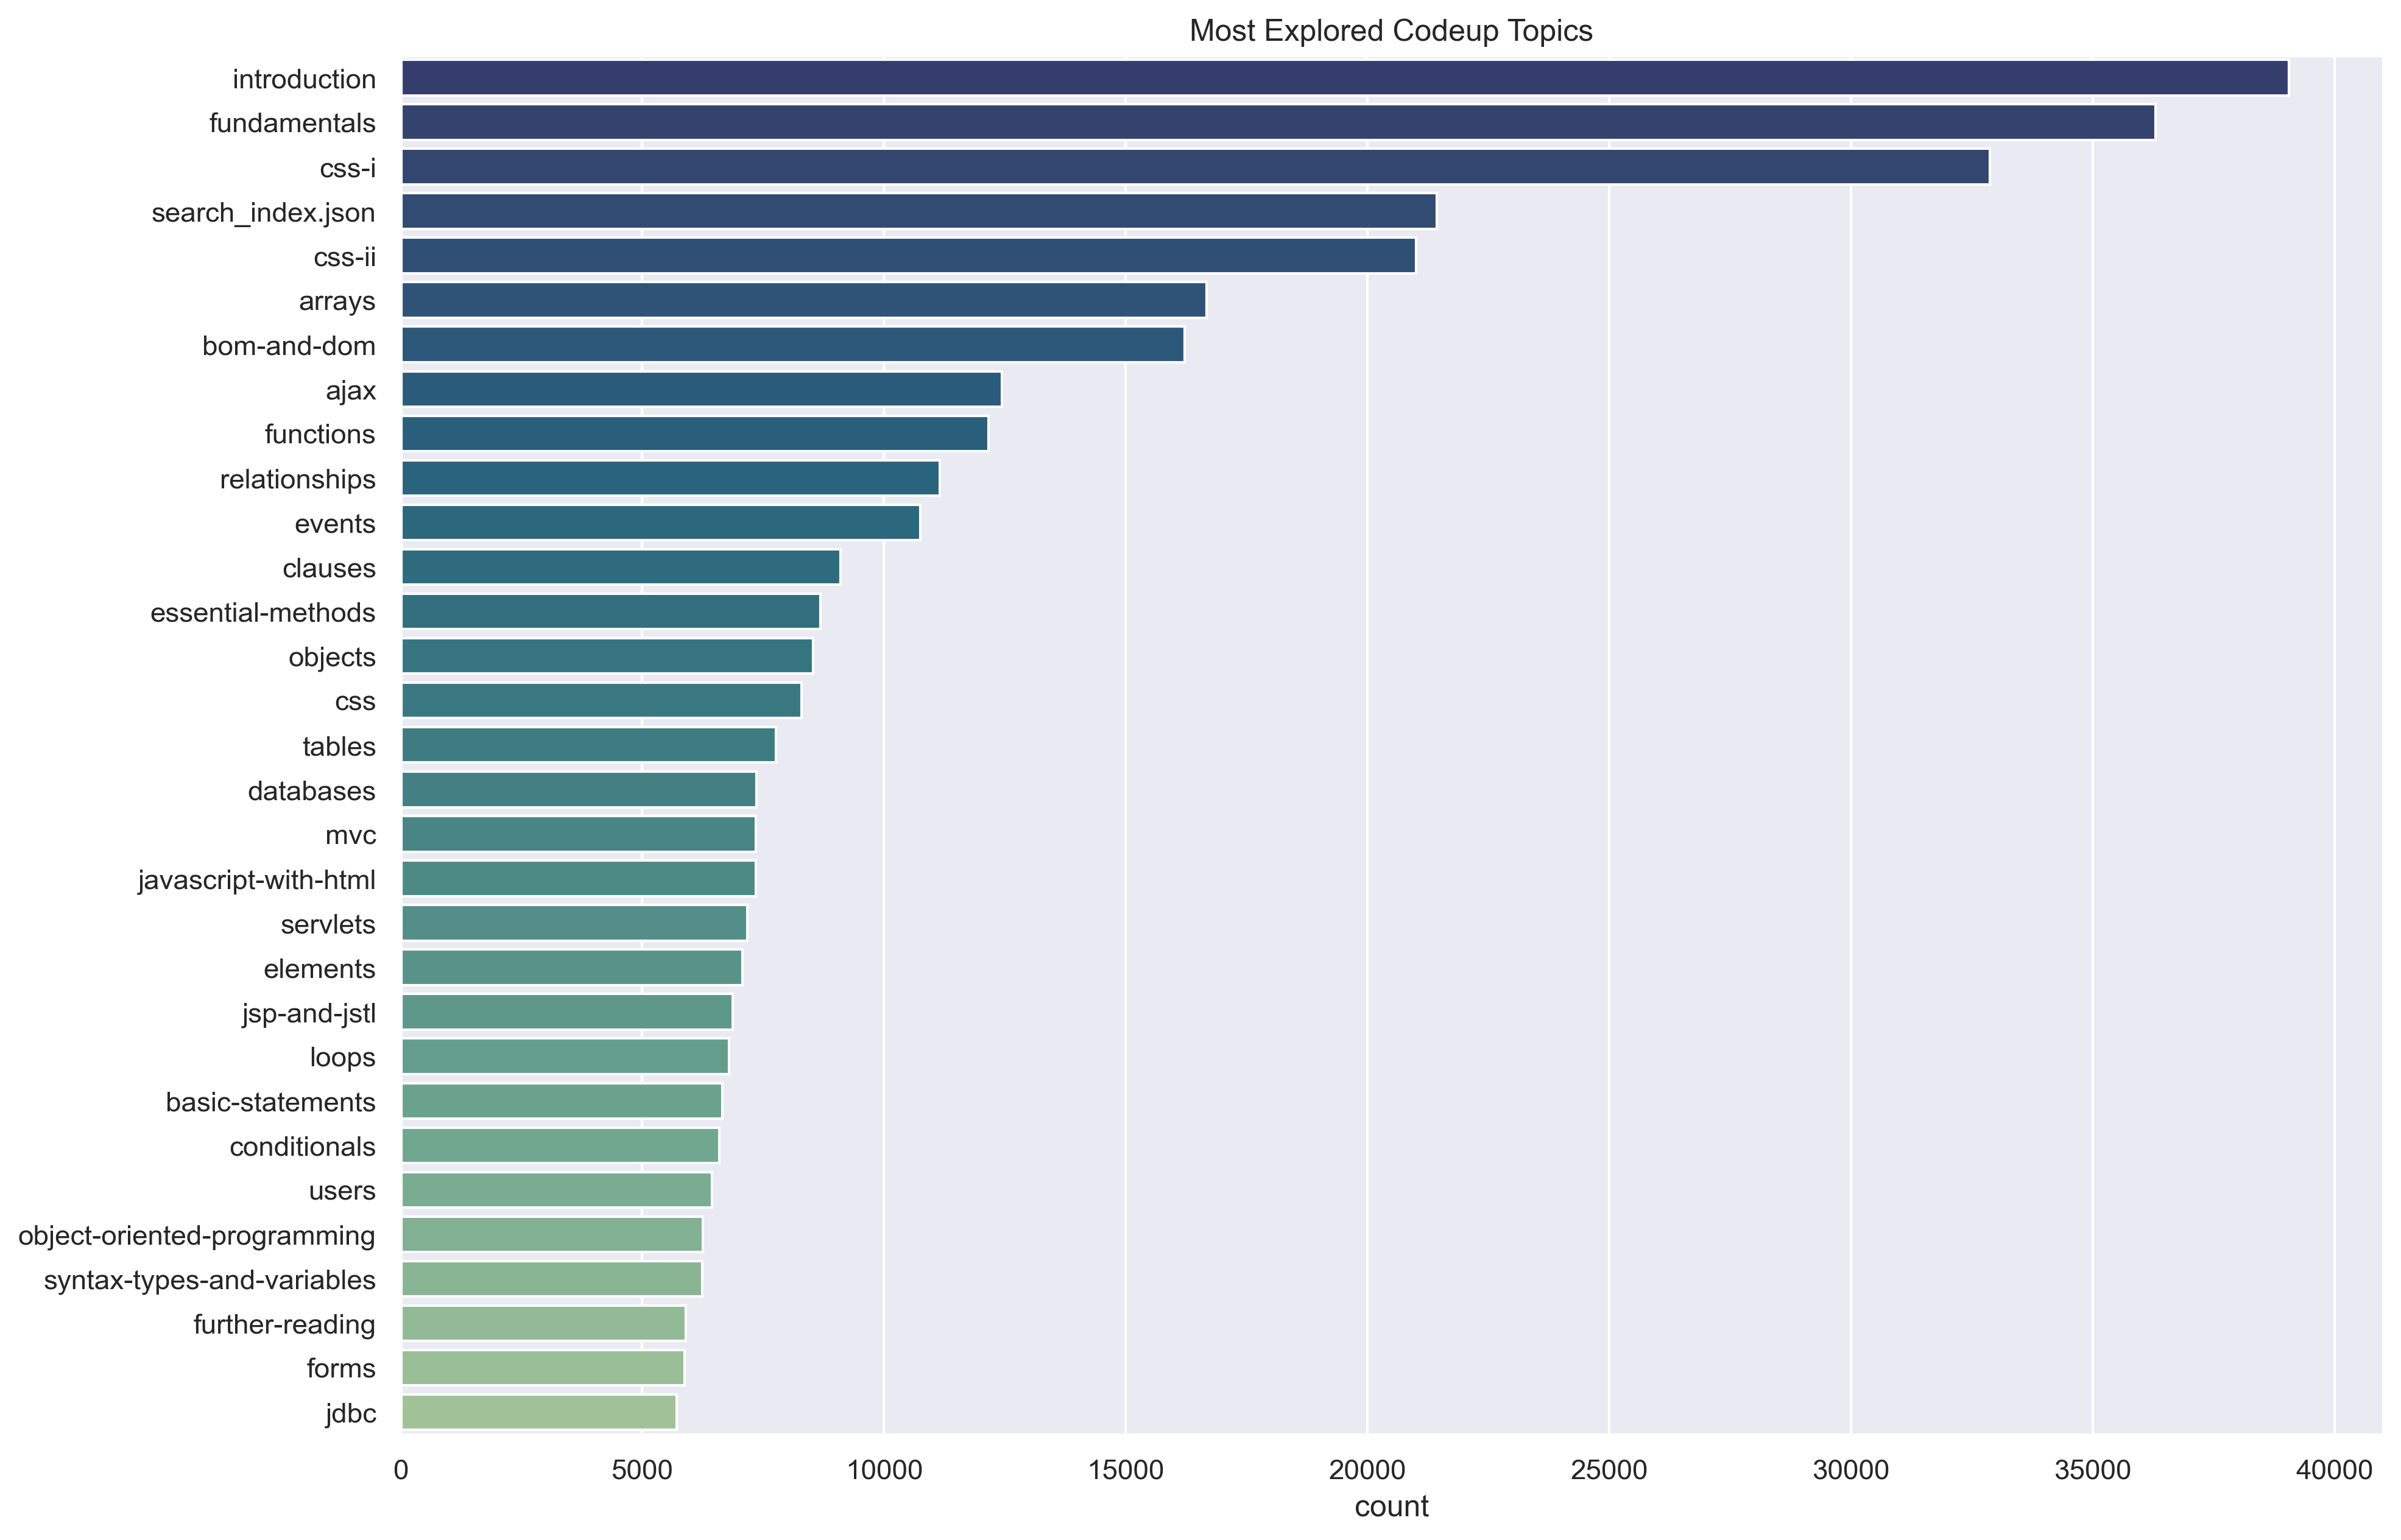

In [37]:
# let's return the top 25 most frequent classes as a plot 

plt.figure(figsize=(14, 10))
sns.set(font_scale = 1)

sns.countplot(
    y = "topic", 
    data = df,
    order = df["topic"].value_counts()[0:31].index,
    palette = "crest_r")

plt.ylabel(None)
plt.title("Most Explored Codeup Topics")
plt.show()

In [38]:
# list of programs 

lst = []
for val in df["program_type"].unique():
    if val != None:
        lst.append(val)

lst

['FS_PHP_program', 'FS_JAVA_program', 'Front_End_program', 'DS_program']

In [39]:
# printing top 5 unique class/topic per program

cols = ["class", "topic"]

for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Most Frequent Class/Module Visited:\n-----------\n{df[df["program_type"] == program]["class"].value_counts(normalize = True).head(10).round(2)}\n')
    print(f'Most Frequent Topic Explored:\n-----------\n{df[df["program_type"] == program]["topic"].value_counts(normalize = True).head(10).round(2)}\n------------------------------------')
    print()

Codeup Program: FS_PHP_program
Most Frequent Class/Module Visited:
-----------
content          0.22
javascript-i     0.13
html-css         0.09
spring           0.08
mysql            0.07
java-iii         0.07
java-ii          0.05
jquery           0.05
java-i           0.05
javascript-ii    0.05
Name: class, dtype: float64

Most Frequent Topic Explored:
-----------
fundamentals    0.06
laravel         0.05
introduction    0.05
html-css        0.04
css-i           0.03
javascript      0.03
css-ii          0.03
php_ii          0.03
git             0.03
bom-and-dom     0.02
Name: topic, dtype: float64
------------------------------------

Codeup Program: FS_JAVA_program
Most Frequent Class/Module Visited:
-----------
javascript-i     0.16
html-css         0.12
mysql            0.11
jquery           0.08
spring           0.08
java-iii         0.08
java-ii          0.08
java-i           0.06
javascript-ii    0.05
appendix         0.05
Name: class, dtype: float64

Most Frequent Topic Explo

In [40]:
# what about while attending codeup?
df["end_date"] = pd.to_datetime(df["end_date"], infer_datetime_format=True)
df["start_date"] = pd.to_datetime(df["start_date"], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900222 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   endpoint      900222 non-null  object        
 1   user_id       900222 non-null  object        
 2   ip            900222 non-null  object        
 3   name          847329 non-null  object        
 4   slack         847329 non-null  object        
 5   start_date    847329 non-null  datetime64[ns]
 6   end_date      847329 non-null  datetime64[ns]
 7   class         849909 non-null  object        
 8   topic         681558 non-null  object        
 9   day           900222 non-null  object        
 10  month         900222 non-null  object        
 11  program_type  847329 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 89.3+ MB


In [41]:
from datetime import datetime

df[df["end_date"] <= datetime.today()]

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,Friday,January,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,Friday,January,FS_PHP_program
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,71.150.217.33,Staff,#,2014-02-04,2014-02-04,jquery,personal-site,Wednesday,April,FS_JAVA_program
2021-04-21 16:42:02,jquery/mapbox-api,64,71.150.217.33,Staff,#,2014-02-04,2014-02-04,jquery,mapbox-api,Wednesday,April,FS_JAVA_program
2021-04-21 16:42:09,jquery/ajax/weather-map,64,71.150.217.33,Staff,#,2014-02-04,2014-02-04,jquery,ajax,Wednesday,April,FS_JAVA_program
2021-04-21 16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86,Staff,#,2014-02-04,2014-02-04,anomaly-detection,discrete-probabilistic-methods,Wednesday,April,FS_JAVA_program


In [42]:
# setting a date column 

df["logdate"] = df.index
df.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type,logdate
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program,2018-01-26 09:55:03
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program,2018-01-26 09:56:02
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,Friday,January,FS_PHP_program,2018-01-26 09:56:05
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,Friday,January,FS_PHP_program,2018-01-26 09:56:06
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program,2018-01-26 09:56:24


In [43]:
# resetting the index 

df = df.reset_index(drop = True)
df.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type,logdate
0,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program,2018-01-26 09:55:03
1,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,Friday,January,FS_PHP_program,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,Friday,January,FS_PHP_program,2018-01-26 09:56:06
4,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program,2018-01-26 09:56:24


In [44]:
# comparing program end date with recorded log date

program_visits = df[df["logdate"] <= df["end_date"]]
program_visits.shape

(647197, 13)

In [45]:
# checking the df info

program_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900216
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   endpoint      647197 non-null  object        
 1   user_id       647197 non-null  object        
 2   ip            647197 non-null  object        
 3   name          647197 non-null  object        
 4   slack         647197 non-null  object        
 5   start_date    647197 non-null  datetime64[ns]
 6   end_date      647197 non-null  datetime64[ns]
 7   class         616911 non-null  object        
 8   topic         514977 non-null  object        
 9   day           647197 non-null  object        
 10  month         647197 non-null  object        
 11  program_type  647197 non-null  object        
 12  logdate       647197 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(10)
memory usage: 69.1+ MB


In [46]:
# can now set the df index to log dates

curr = program_visits.set_index("logdate").sort_index()
curr.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
logdate,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,loops,Friday,January,FS_JAVA_program
2018-01-26 09:56:46,javascript-i/conditionals,3,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,conditionals,Friday,January,FS_JAVA_program
2018-01-26 09:56:48,javascript-i/functions,3,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,functions,Friday,January,FS_JAVA_program
2018-01-26 09:56:59,javascript-i/loops,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,javascript-i,loops,Friday,January,FS_JAVA_program


In [47]:
# let's see what ea. program cohort searches throughout while attending codeup

for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Most Frequent Class/Module Visited:\n-----------\n{curr[curr["program_type"] == program]["class"].value_counts(normalize = True).head(5).round(2)}\n')
    print(f'Most Frequent Topic Explored:\n-----------\n{curr[curr["program_type"] == program]["topic"].value_counts(normalize = True).head(5).round(2)}\n------------------------------------')
    print()

Codeup Program: FS_PHP_program
Most Frequent Class/Module Visited:
-----------
Series([], Name: class, dtype: float64)

Most Frequent Topic Explored:
-----------
Series([], Name: topic, dtype: float64)
------------------------------------

Codeup Program: FS_JAVA_program
Most Frequent Class/Module Visited:
-----------
javascript-i    0.18
html-css        0.13
mysql           0.12
jquery          0.09
java-iii        0.08
Name: class, dtype: float64

Most Frequent Topic Explored:
-----------
introduction    0.07
css-i           0.06
fundamentals    0.06
css-ii          0.04
arrays          0.03
Name: topic, dtype: float64
------------------------------------

Codeup Program: Front_End_program
Most Frequent Class/Module Visited:
-----------
Series([], Name: class, dtype: float64)

Most Frequent Topic Explored:
-----------
Series([], Name: topic, dtype: float64)
------------------------------------

Codeup Program: DS_program
Most Frequent Class/Module Visited:
-----------
fundamentals   

In [57]:
# least revisited classes while at codeup 

for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Least Frequent Class/Module Visited:\n-----------\n{curr[curr["program_type"] == program]["class"].value_counts(normalize = True).tail(5)}\n')
    print(f'Least Frequent Topic Visited:\n-----------\n{curr[curr["program_type"] == program]["topic"].value_counts(normalize = True).tail(5)}\n------------------------------------')
    print()

Codeup Program: FS_PHP_program
Least Frequent Class/Module Visited:
-----------
Series([], Name: class, dtype: float64)

Least Frequent Topic Visited:
-----------
Series([], Name: topic, dtype: float64)
------------------------------------

Codeup Program: FS_JAVA_program
Least Frequent Class/Module Visited:
-----------
3.2-databases           0.000002
3.4-basic-statements    0.000002
3.6-functions           0.000002
3.9-temporary-tables    0.000002
css                     0.000002
Name: class, dtype: float64

Least Frequent Topic Visited:
-----------
twitter.html    0.000002
9.3-joins       0.000002
120             0.000002
apendix         0.000002
PreWork         0.000002
Name: topic, dtype: float64
------------------------------------

Codeup Program: Front_End_program
Least Frequent Class/Module Visited:
-----------
Series([], Name: class, dtype: float64)

Least Frequent Topic Visited:
-----------
Series([], Name: topic, dtype: float64)
------------------------------------

Codeup 

----
### ``What topics are grads continuing to reference after graduation and into their jobs (for each program)?``

In [49]:
# comparing program end date with recorded log date

grad_visits = df[df["logdate"] > df["end_date"]]
grad_visits.shape

(200132, 13)

In [50]:
# checking the df info

grad_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200132 entries, 0 to 900221
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   endpoint      200132 non-null  object        
 1   user_id       200132 non-null  object        
 2   ip            200132 non-null  object        
 3   name          200132 non-null  object        
 4   slack         200132 non-null  object        
 5   start_date    200132 non-null  datetime64[ns]
 6   end_date      200132 non-null  datetime64[ns]
 7   class         184564 non-null  object        
 8   topic         140907 non-null  object        
 9   day           200132 non-null  object        
 10  month         200132 non-null  object        
 11  program_type  200132 non-null  object        
 12  logdate       200132 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(10)
memory usage: 21.4+ MB


In [51]:
# can now set the df index to log dates

grad = grad_visits.set_index("logdate").sort_index()
grad.head()

,endpoint,user_id,ip,name,slack,start_date,end_date,class,topic,day,month,program_type
logdate,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,None,None,Friday,January,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,None,Friday,January,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,Friday,January,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,Friday,January,FS_PHP_program
2018-01-26 10:14:47,/,11,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,None,None,Friday,January,FS_PHP_program


In [52]:
# let's see what ea. program graduate class is searching


for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Most Frequent Class/Module Visited:\n-----------\n{grad[grad["program_type"] == program]["class"].value_counts(normalize = True).head(5).round(2)}\n')
    print(f'Most Frequent Topic Explored:\n-----------\n{grad[grad["program_type"] == program]["topic"].value_counts(normalize = True).head(5).round(2)}\n------------------------------------')
    print()

Codeup Program: FS_PHP_program
Most Frequent Class/Module Visited:
-----------
content         0.22
javascript-i    0.13
html-css        0.09
spring          0.08
mysql           0.07
Name: class, dtype: float64

Most Frequent Topic Explored:
-----------
fundamentals    0.06
laravel         0.05
introduction    0.05
html-css        0.04
css-i           0.03
Name: topic, dtype: float64
------------------------------------

Codeup Program: FS_JAVA_program
Most Frequent Class/Module Visited:
-----------
javascript-i    0.11
spring          0.10
html-css        0.08
mysql           0.08
appendix        0.07
Name: class, dtype: float64

Most Frequent Topic Explored:
-----------
fundamentals         0.08
introduction         0.04
css-i                0.04
search_index.json    0.03
ajax                 0.02
Name: topic, dtype: float64
------------------------------------

Codeup Program: Front_End_program
Most Frequent Class/Module Visited:
-----------
content    1.0
Name: class, dtype: float

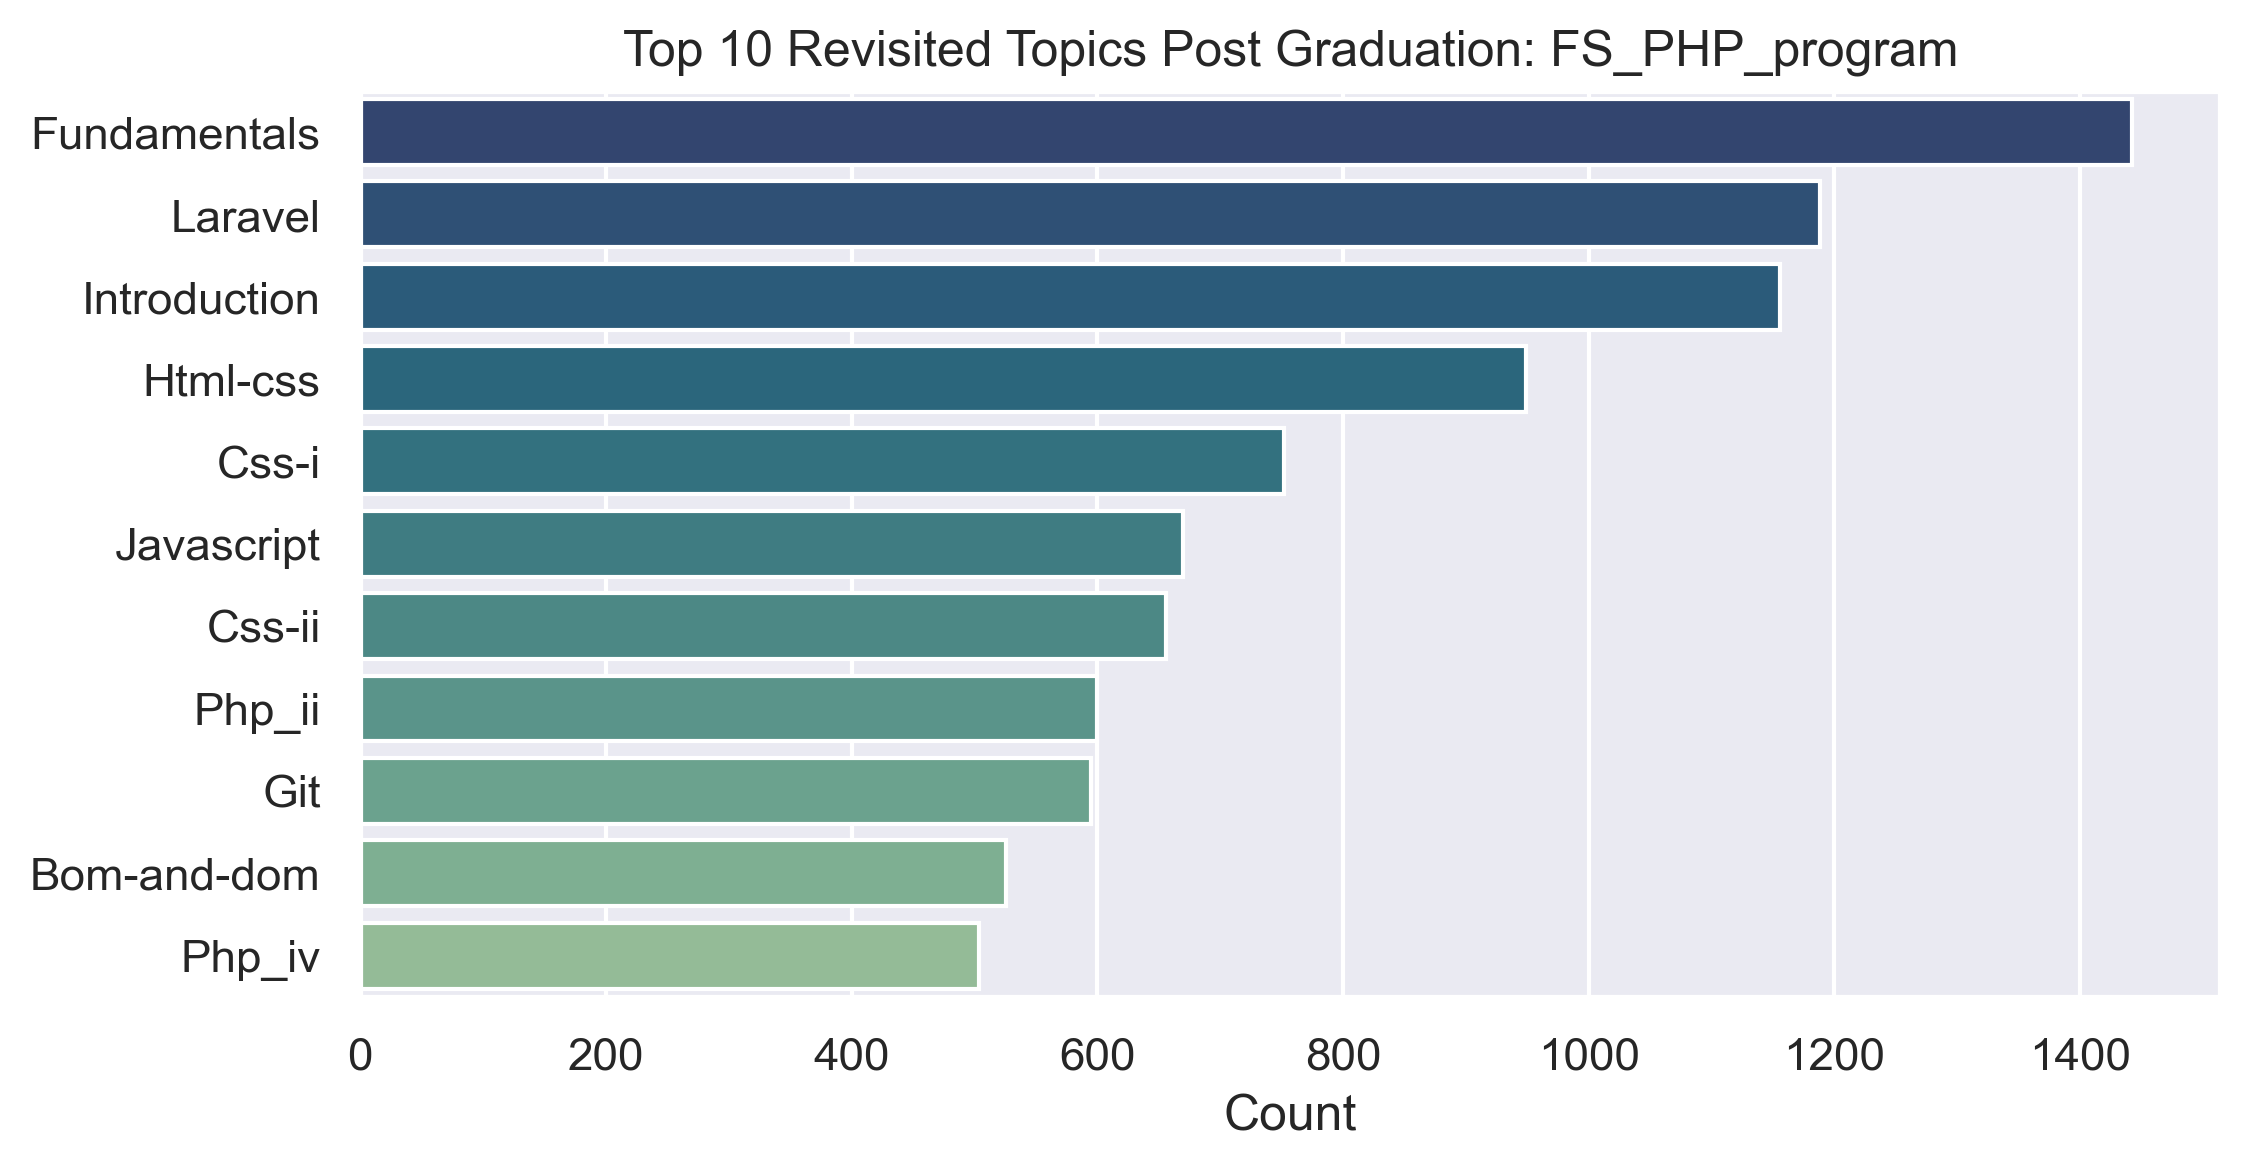

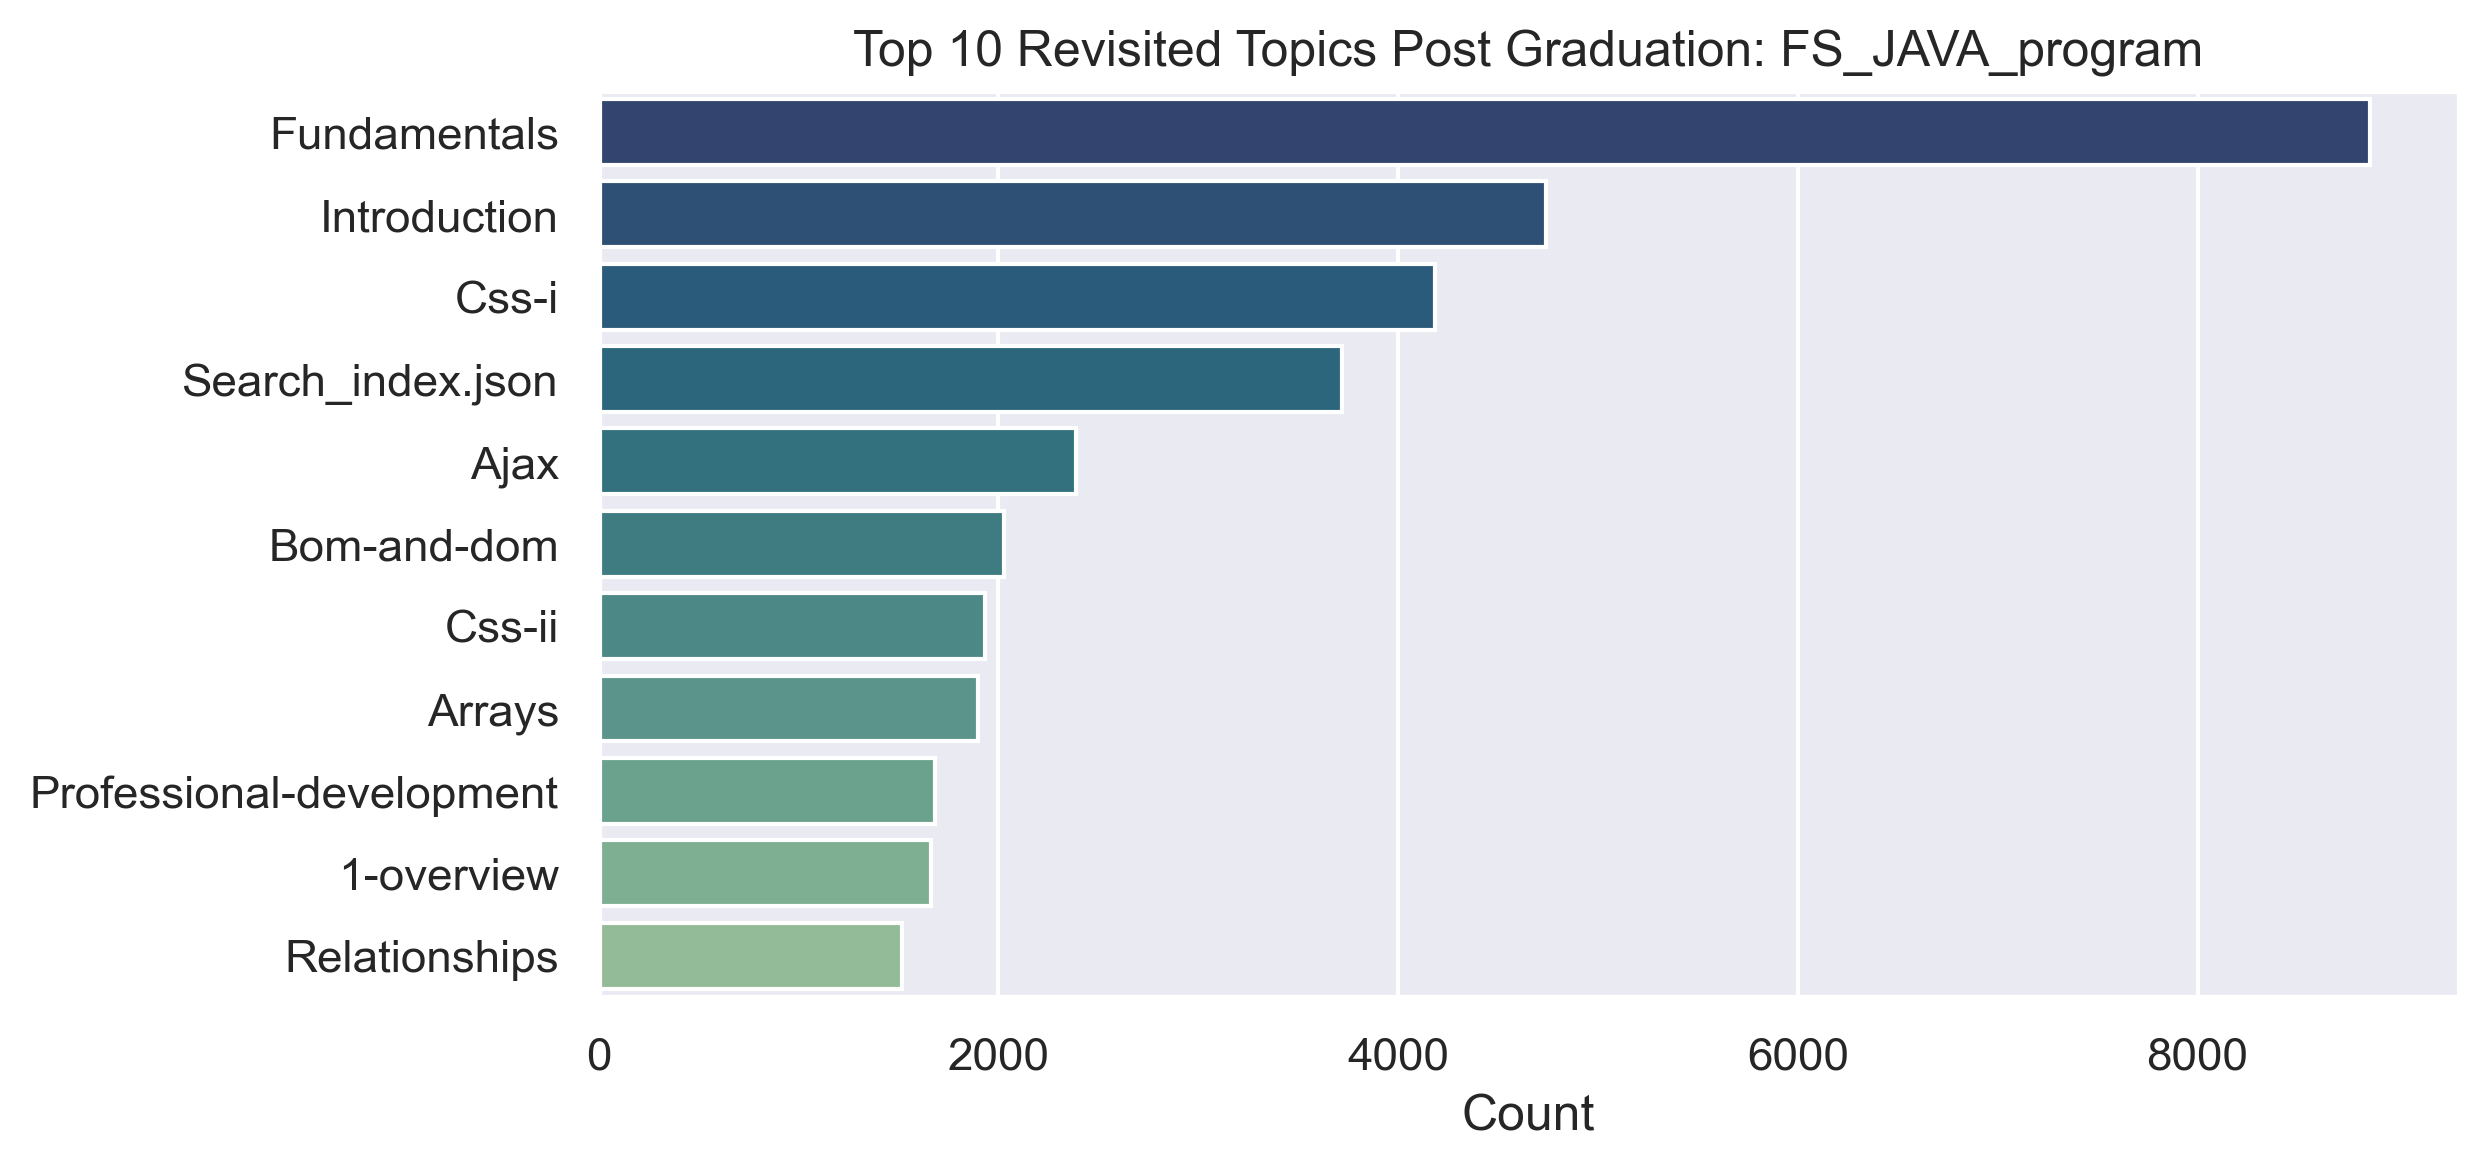

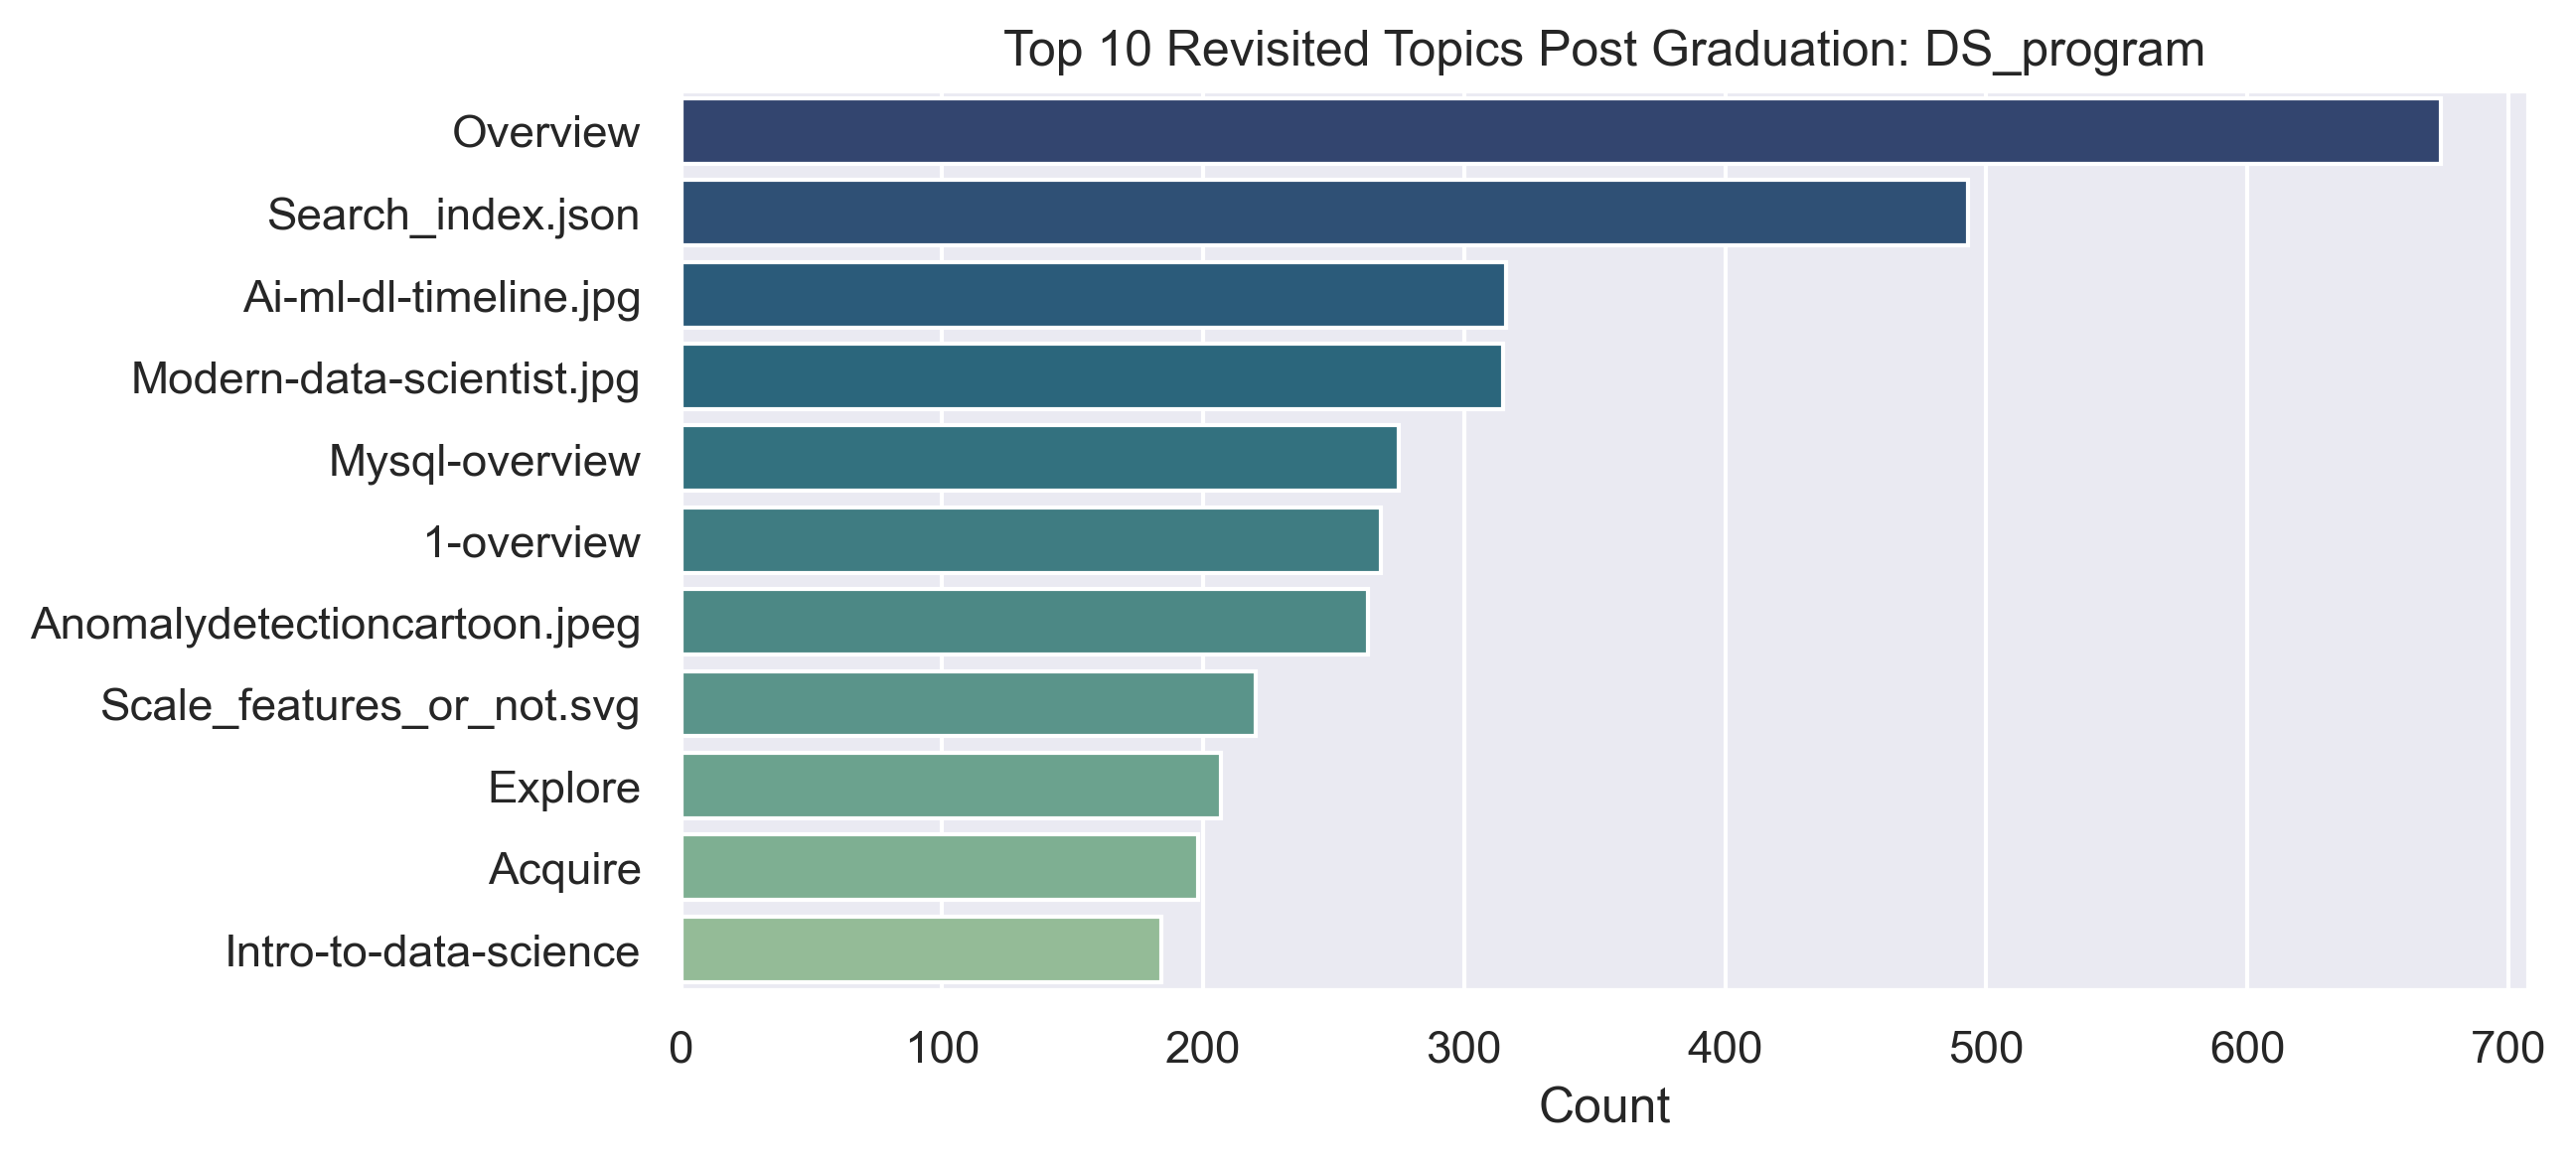

In [53]:
# plotting the top 10 most visited topics of Codeup graduates by program

for program in lst:

    if program != "Front_End_program":
        plt.figure(figsize = (8, 4))
        sns.set(font_scale = 1)

        df1 = grad[grad["program_type"] == program]

        df1 = df1.applymap(lambda s: s.capitalize() if type(s) == str else s)

        sns.countplot(
            y = "topic", 
            data = df1,
            order = df1["topic"].value_counts()[0:11].index,
            palette = "crest_r")

        plt.ylabel(None)
        plt.xlabel("Count")
        plt.title(f'Top 10 Revisited Topics Post Graduation: {program}')
        plt.show()

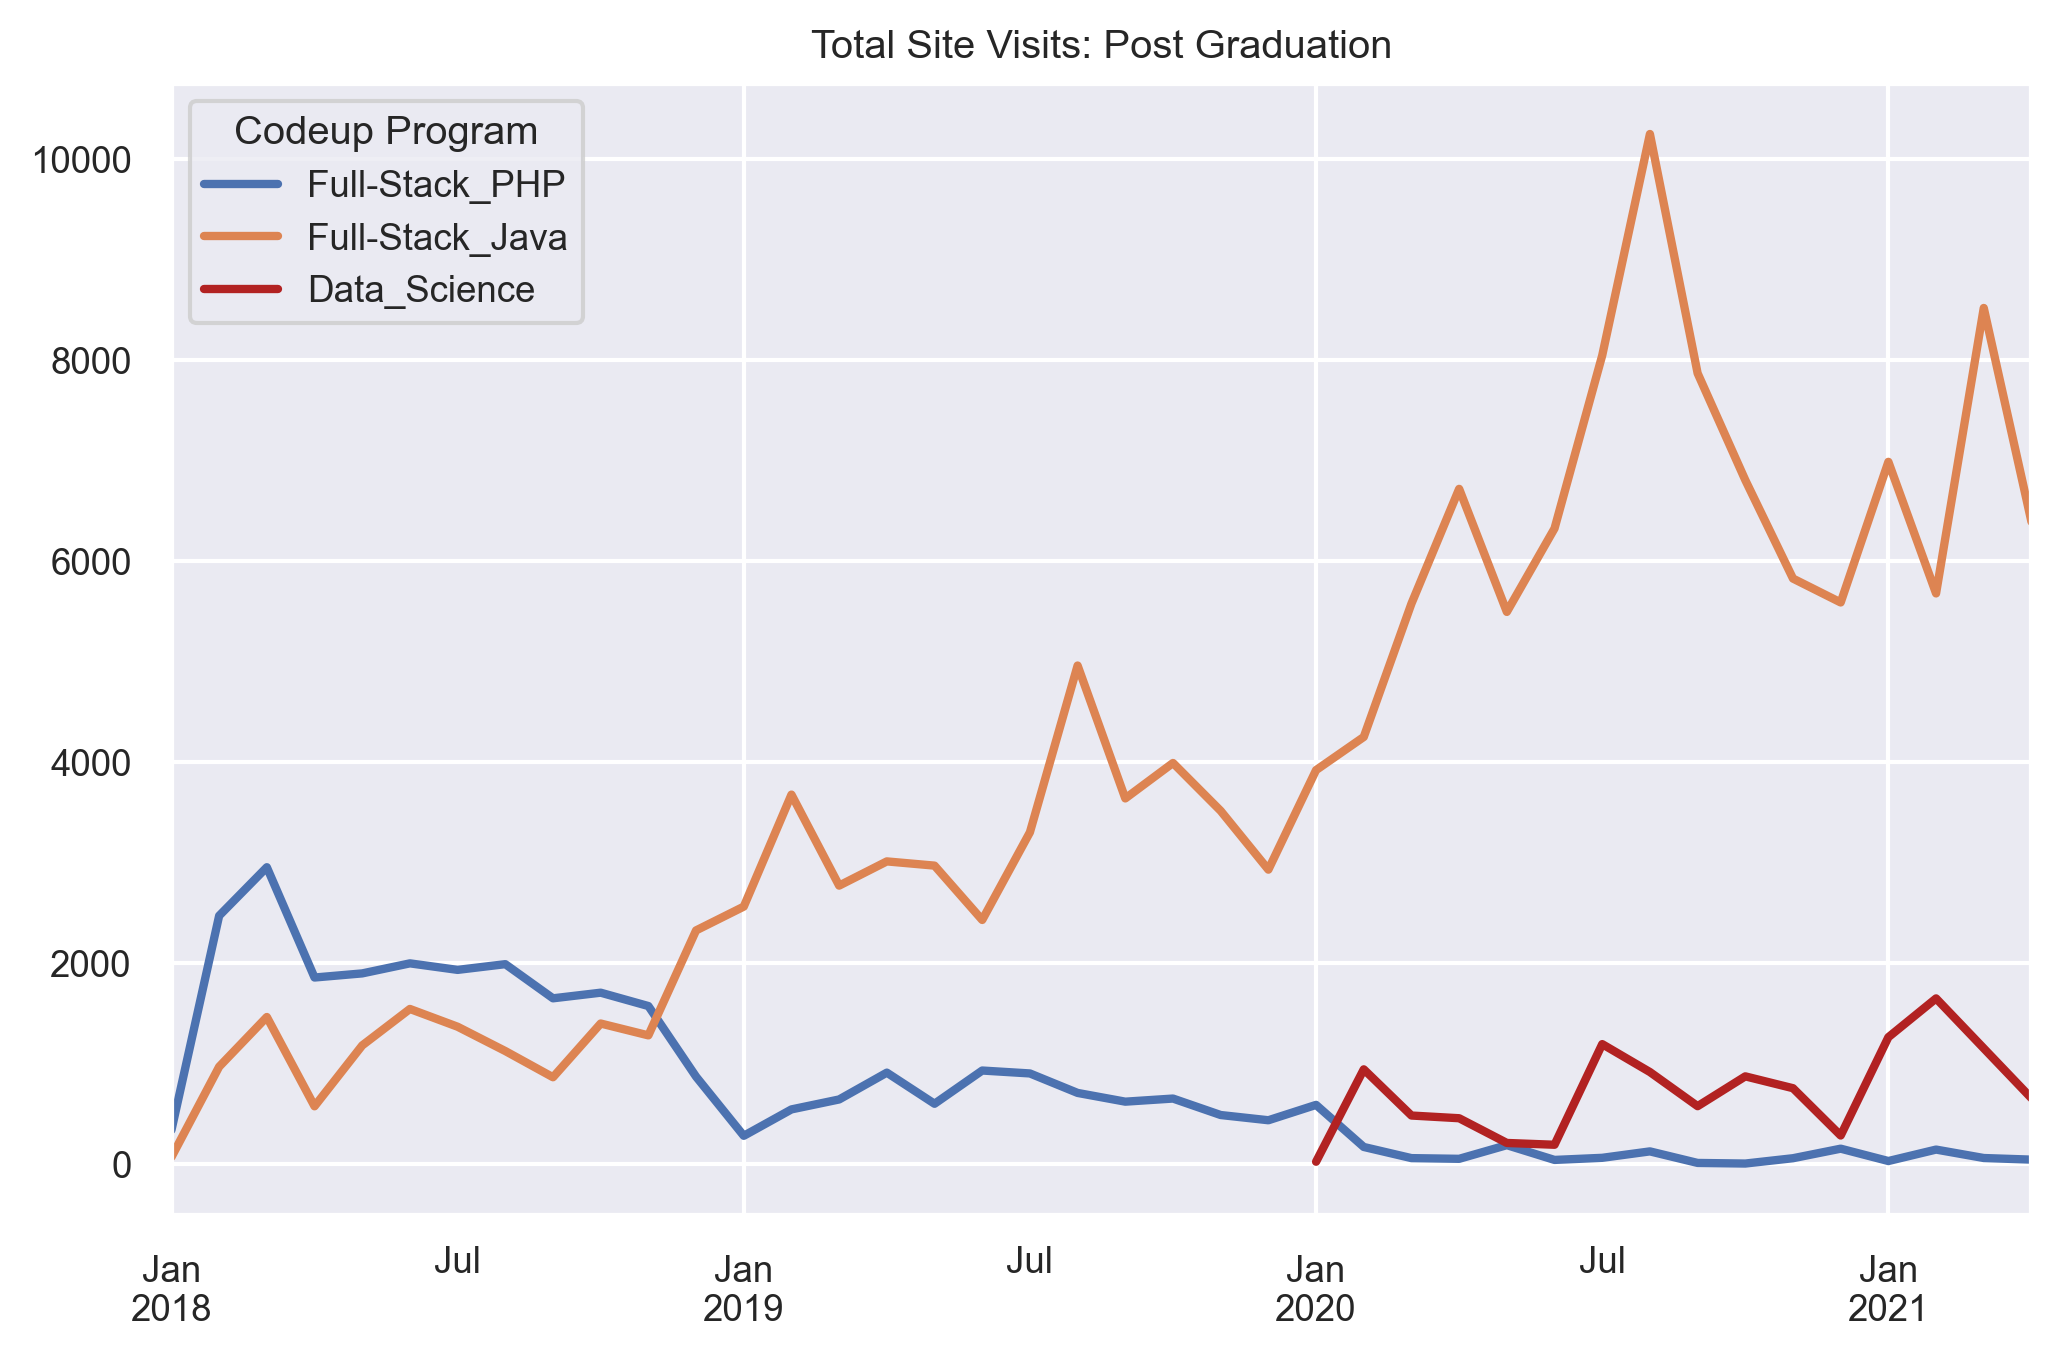

In [54]:
# let's check the frequency of usage by month and program:

plt.figure(figsize=(8, 5))
sns.set(font_scale = .8)

grad[grad['program_type'] == 'FS_PHP_program']["endpoint"].resample('M').count().plot(label = "Full-Stack_PHP", linewidth = 2)
grad[grad['program_type'] == 'FS_JAVA_program']["endpoint"].resample('M').count().plot(label = "Full-Stack_Java", linewidth = 2)
grad[grad['program_type'] == 'DS_program']["endpoint"].resample('M').count().plot(label = "Data_Science", color = "firebrick", linewidth = 2)
# grad[grad['program_type'] == 'Front_End_program']["endpoint"].resample('M').count().plot(label = "Front_End")


plt.title("Total Site Visits: Post Graduation")
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.legend(title = "Codeup Program")
plt.show()

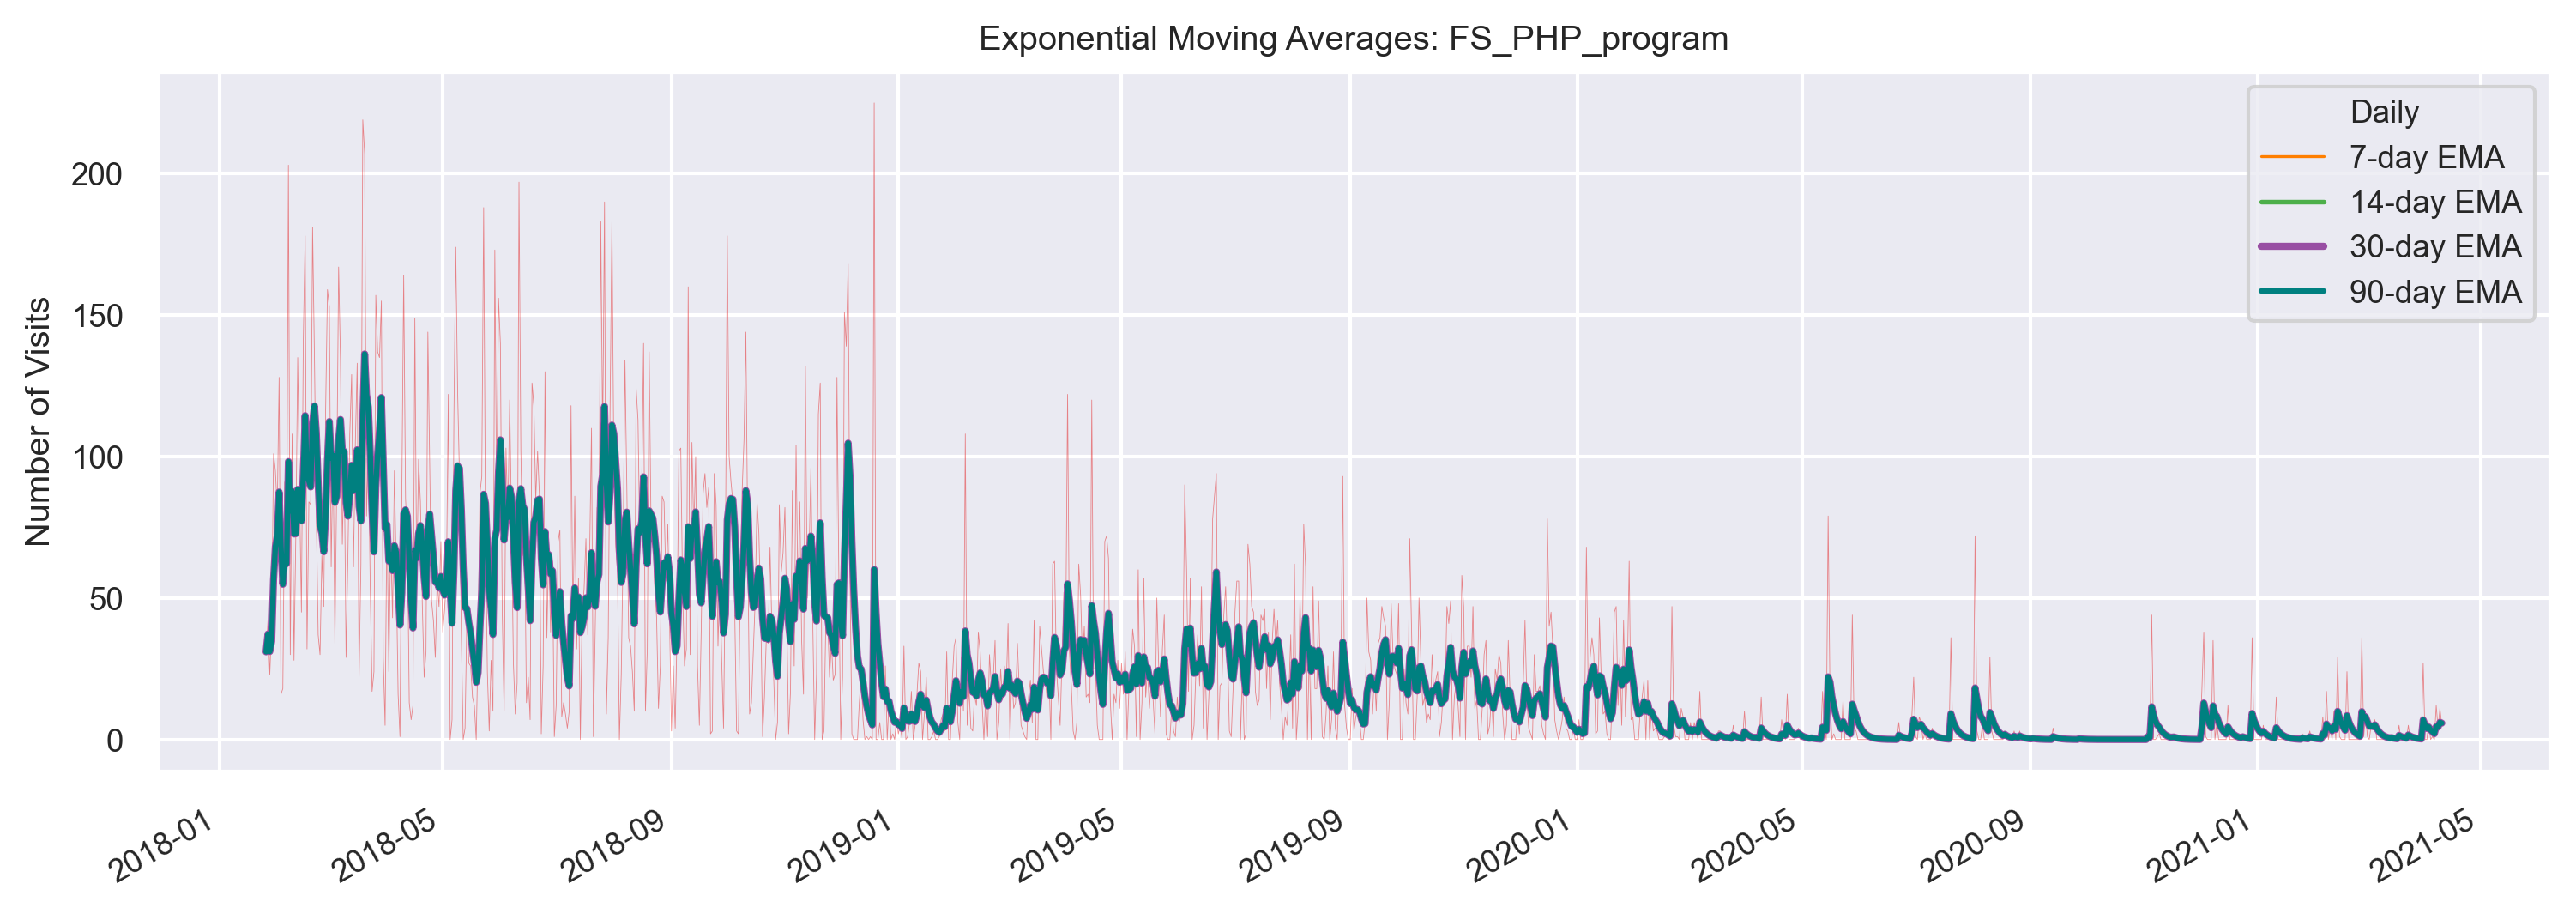

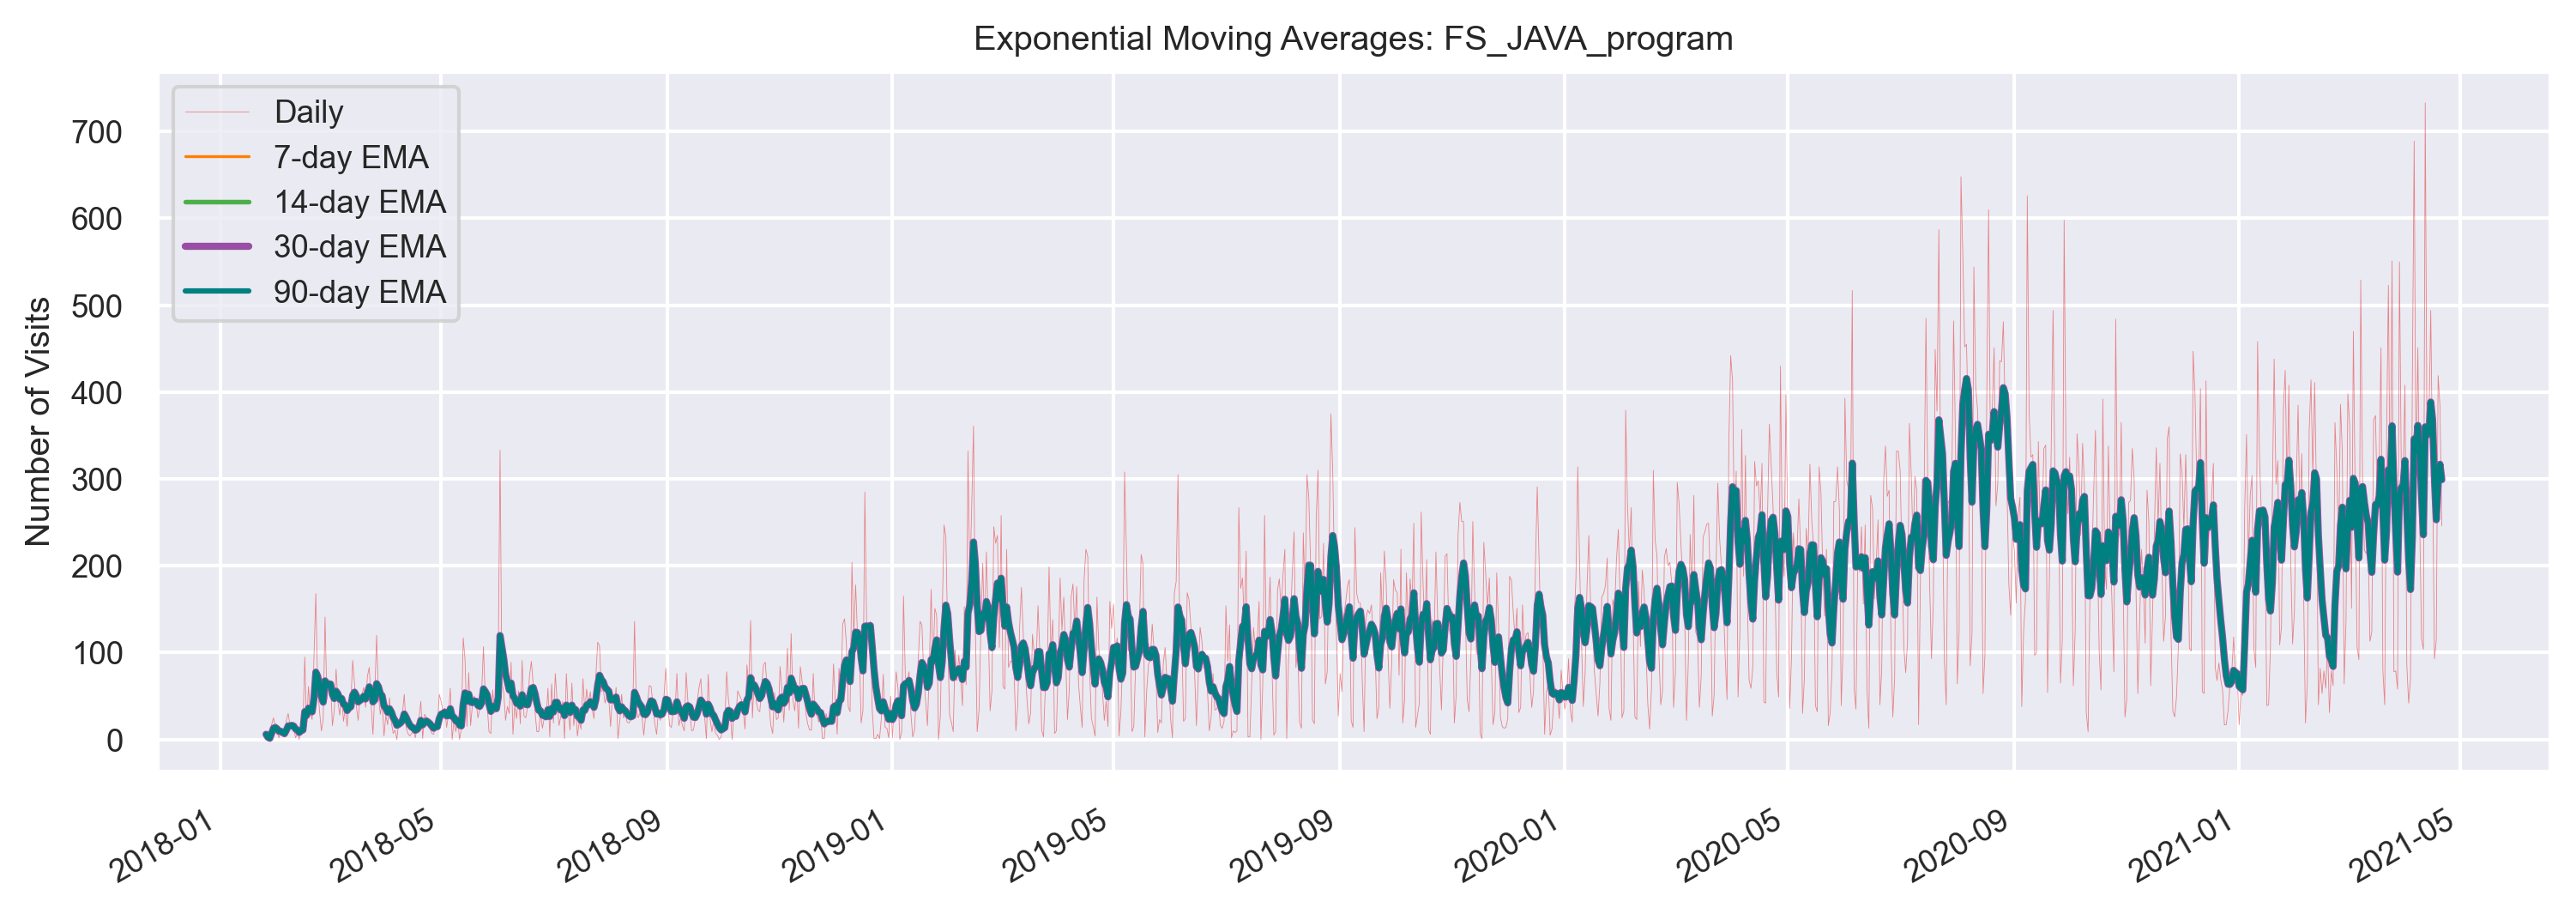

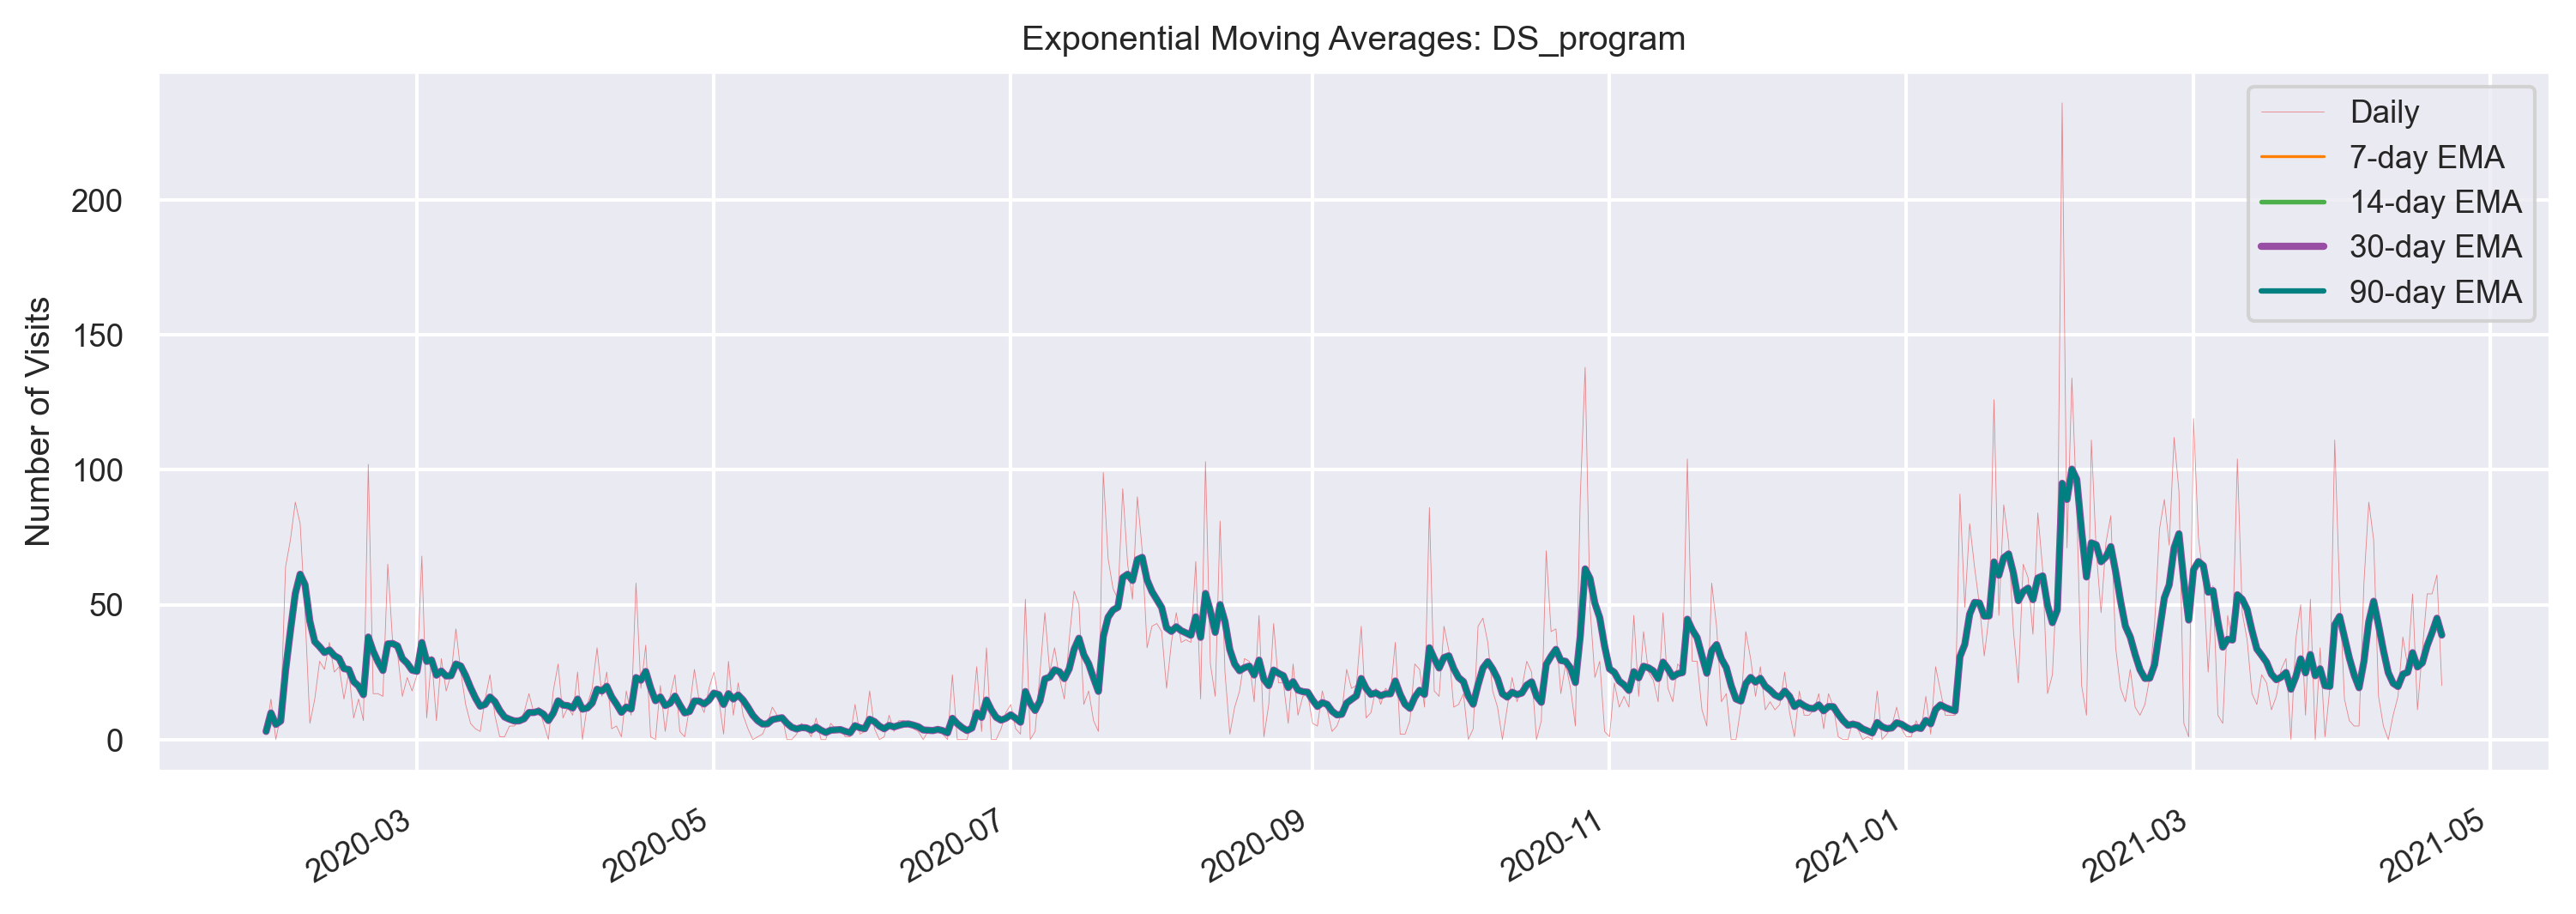

In [55]:
# what are the exponential moving averages for post-graduation codeup visits


for program in lst:

    if program != "Front_End_program":
        plt.figure(figsize=(12, 4))
        sns.set(font_scale = 0.8, context = "notebook")

        # setting the appropriate grad for ea. column to resample on
        visits = grad[grad['program_type'] == program]["endpoint"].resample('D').count()

        ema_7d = visits.ewm(span=7).mean()
        ema_14d = visits.ewm(span=7).mean()
        ema_30d = visits.ewm(span=7).mean()
        ema_90d = visits.ewm(span=7).mean()

        plt.plot(visits.index, visits, label='Daily', alpha=.5, linewidth = 0.2, color = '#e41a1c')
        
        ema_7d.plot(label = '7-day EMA', color = '#ff7f00', linewidth = 0.8)
        ema_14d.plot(label = '14-day EMA', color = '#4daf4a', linewidth = 1.3)
        ema_30d.plot(label = '30-day EMA', color = "#984ea3", linewidth = 2)
        ema_90d.plot(label = '90-day EMA', color = 'teal', linewidth = 1.5)

        plt.legend(loc='best')
        plt.ylabel('Number of Visits')
        plt.xlabel(None)

        plt.title(f'Exponential Moving Averages: {program}')
        plt.show()

----
### ``Which lessons are least accessed?``


**<u>Can approach this two (2) ways:</u>**

1. While enrolled in a program 
2. Post graduation

In [56]:
# least revisited classes post graduation 

for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Least Frequent Class/Module Revisited:\n-----------\n{grad[grad["program_type"] == program]["class"].value_counts(normalize = True).tail(5)}\n')
    print(f'Least Frequent Topic Revisited:\n-----------\n{grad[grad["program_type"] == program]["topic"].value_counts(normalize = True).tail(5)}\n------------------------------------')
    print()

Codeup Program: FS_PHP_program
Least Frequent Class/Module Revisited:
-----------
2.00.02_Navigating_Excel                 0.000035
2.00.05_Charts_PivotTables_Sparklines    0.000035
2.02.00_Inferential_Stats                0.000035
Exercises                                0.000035
ajax-api-request.html                    0.000035
Name: class, dtype: float64

Least Frequent Topic Revisited:
-----------
threads                    0.000044
2.4-more-excel-features    0.000044
1-tidy-data                0.000044
data-viz-references        0.000044
loops.html                 0.000044
Name: topic, dtype: float64
------------------------------------

Codeup Program: FS_JAVA_program
Least Frequent Class/Module Revisited:
-----------
Correlation.md                  0.000007
Clustering_Explore              0.000007
5.04.04_LeastAngleRegression    0.000007
6.00_Intro                      0.000007
curie-python-assessment         0.000007
Name: class, dtype: float64

Least Frequent Topic Revisited:
